In [2]:
import numpy as np
import matplotlib.pyplot as plt

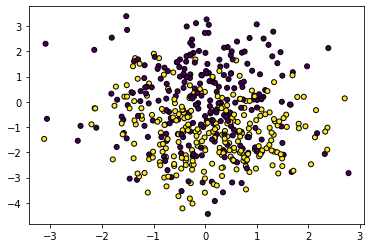

In [3]:
from sklearn import linear_model
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = make_classification(n_samples = 500, n_features = 10, n_redundant = 2, n_informative = 4,n_clusters_per_class = 2, random_state = 14)
plt.scatter(X[:, 0], X[:, 1], marker = 'o', c=y, s = 25, edgecolor = 'k')

In [4]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

intercept = np.ones((X_train.shape[0], 1))
X_train = np.concatenate((intercept, X_train), axis=1)  

intercept = np.ones((X_test.shape[0], 1))
X_test = np.concatenate((intercept, X_test), axis=1)  

In [5]:
def mini_batch_GD(X, y, max_iter=1000):
    w = np.zeros(X.shape[1])
    l_rate = 0.01
    #10% of data
    batch_size = int(0.1 * X.shape[0])
    for i in range(max_iter):
        ix = np.random.randint(0, X.shape[0]) #<----with replacement
        batch_X = X[ix:ix+batch_size]
        batch_y = y[ix:ix+batch_size]
        cost, grad = gradient(batch_X, batch_y, w)
        if i % 500 == 0:
            print(f"Cost at iteration {i}", cost)
        w = w - l_rate * grad
    return w, i

def gradient(X, y, w):
    m = X.shape[0]
    h = h_theta(X, w)
    error = h - y
    #putting negative sign for negative log likelihood
    cost = -np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    grad = np.dot(X.T, error)
    return cost, grad

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
        
def h_theta(X, w):
    return sigmoid(X @ w)

def output(pred):
    return np.round(pred)

w, i = mini_batch_GD(X_train, y_train, max_iter = 10000)

Cost at iteration 0 24.26015131959808
Cost at iteration 500 18.33986547657023
Cost at iteration 1000 9.931079342802068
Cost at iteration 1500 19.87315779853604
Cost at iteration 2000 11.288350896436398
Cost at iteration 2500 12.862188141201322
Cost at iteration 3000 10.568771803728357
Cost at iteration 3500 16.18013034438036
Cost at iteration 4000 16.208415725050546
Cost at iteration 4500 17.139024303362383
Cost at iteration 5000 16.10489195333934
Cost at iteration 5500 18.241525127584634
Cost at iteration 6000 11.68864484385668
Cost at iteration 6500 9.087636413028777
Cost at iteration 7000 13.166105320803439
Cost at iteration 7500 11.816787424230233
Cost at iteration 8000 21.614692437088806
Cost at iteration 8500 11.2930329090209
Cost at iteration 9000 12.256422617437156
Cost at iteration 9500 16.484547537996477


In [10]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

yhat = output(h_theta(X_test, w))
print(classification_report(y_test, yhat))
print(roc_auc_score(y_test, yhat))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83        81
           1       0.81      0.75      0.78        69

    accuracy                           0.81       150
   macro avg       0.81      0.80      0.80       150
weighted avg       0.81      0.81      0.81       150

0.8027375201288245


In [11]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X = iris.data[:, 2:]  
y = iris.target  

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)


intercept = np.ones((X_train.shape[0], 1))
X_train = np.concatenate((intercept, X_train), axis=1)  
intercept = np.ones((X_test.shape[0], 1))
X_test = np.concatenate((intercept, X_test), axis=1) 

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize
from sklearn.metrics import average_precision_score

model = LogisticRegression(multi_class = "ovr")  #set this to multiclass="ovr" to perform multinomial logistic

model.fit(X_train, y_train)
yhat = model.predict(X_test)

print("=========Average precision score=======")
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
yhat_binarized   = label_binarize(yhat, classes=[0, 1, 2])

n_classes = len(np.unique(y_test))

for i in range(n_classes):
    class_score = average_precision_score(y_test_binarized[:, i], yhat_binarized[:, i])
    print(f"Class {i} score: ", class_score)

print("Report: ", classification_report(y_test, yhat))

=========Average precision score=======
Class 0 score:  1.0
Class 1 score:  0.861111111111111
Class 2 score:  0.826984126984127
Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      0.88      0.90        16
           2       0.87      0.93      0.90        14

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45

